In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'housing.csv')

In [3]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

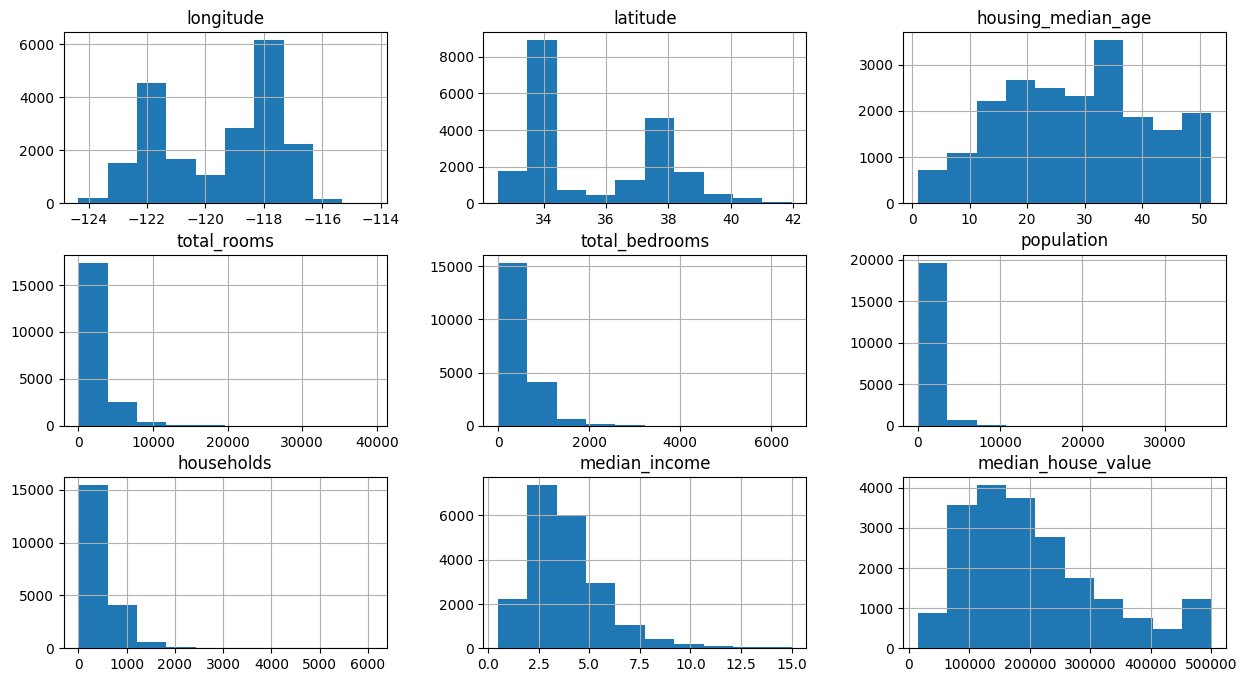

In [6]:
import seaborn as sns
data.hist(figsize=(15,8))

In [7]:
from sklearn.model_selection import train_test_split

X =  data.drop(['median_house_value'] ,axis=1)

y = data['median_house_value']

In [8]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [9]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4747,-118.34,34.05,39.0,975.0,292.0,723.0,285.0,2.2725,<1H OCEAN,140600.0
14735,-117.03,32.82,16.0,1765.0,289.0,743.0,280.0,4.9744,<1H OCEAN,209700.0
19875,-119.29,36.33,19.0,792.0,232.0,641.0,222.0,0.7445,INLAND,112500.0
20141,-119.06,34.36,52.0,1409.0,359.0,981.0,304.0,2.7951,<1H OCEAN,199300.0
316,-122.20,37.75,36.0,606.0,132.0,531.0,133.0,1.5809,NEAR BAY,70000.0
...,...,...,...,...,...,...,...,...,...,...
18533,-122.02,36.97,29.0,2568.0,747.0,1743.0,659.0,1.9286,NEAR OCEAN,195300.0
3979,-118.61,34.19,28.0,3824.0,749.0,1790.0,701.0,4.1154,<1H OCEAN,246400.0
19238,-122.62,38.54,24.0,2409.0,464.0,1006.0,403.0,4.5167,<1H OCEAN,265200.0
1989,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

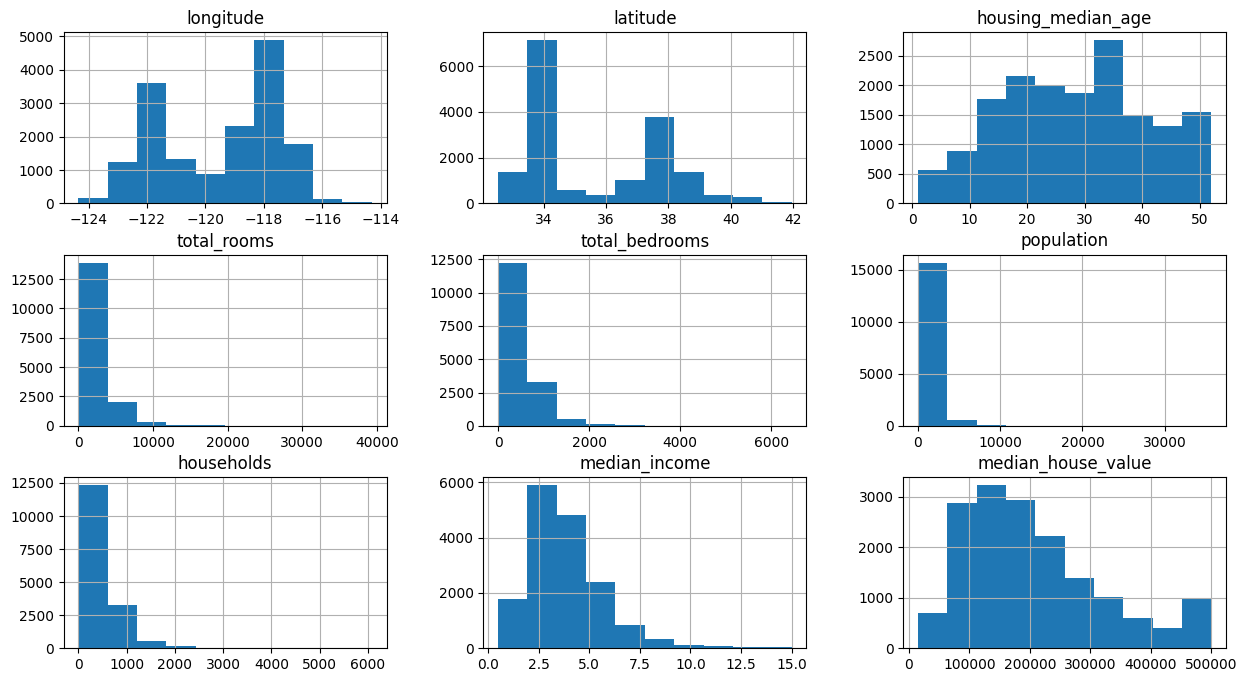

In [10]:
train_data.hist(figsize=(15,8))

In [11]:
train_data['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder();

train_data['ocean_proximity'] = lbl_encoder.fit_transform(train_data['ocean_proximity'])

<Axes: >

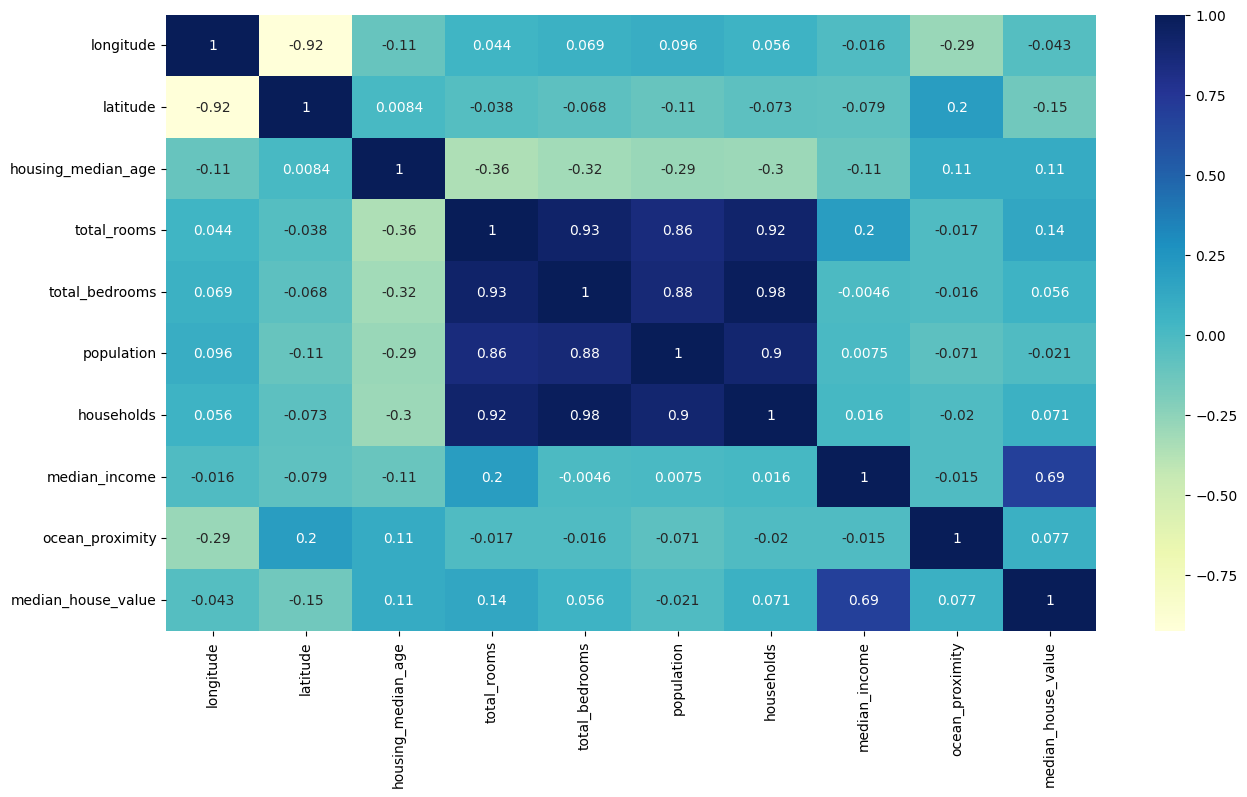

In [13]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

In [14]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924203,-0.105483,0.044170,0.068621,0.096232,0.055530,-0.016316,-0.292108,-0.043265
latitude,-0.924203,1.000000,0.008366,-0.037601,-0.068157,-0.106887,-0.073031,-0.079454,0.202501,-0.146811
housing_median_age,-0.105483,0.008366,1.000000,-0.357427,-0.317574,-0.291280,-0.299405,-0.112850,0.108947,0.106021
total_rooms,0.044170,-0.037601,-0.357427,1.000000,0.929534,0.856177,0.918553,0.201463,-0.016966,0.138282
total_bedrooms,0.068621,-0.068157,-0.317574,0.929534,1.000000,0.876132,0.980294,-0.004632,-0.016467,0.055542
population,0.096232,-0.106887,-0.291280,0.856177,0.876132,1.000000,0.904742,0.007545,-0.071326,-0.020842
households,0.055530,-0.073031,-0.299405,0.918553,0.980294,0.904742,1.000000,0.016407,-0.020449,0.071111
median_income,-0.016316,-0.079454,-0.112850,0.201463,-0.004632,0.007545,0.016407,1.000000,-0.015081,0.688768
ocean_proximity,-0.292108,0.202501,0.108947,-0.016966,-0.016467,-0.071326,-0.020449,-0.015081,1.000000,0.077331
median_house_value,-0.043265,-0.146811,0.106021,0.138282,0.055542,-0.020842,0.071111,0.688768,0.077331,1.000000


In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

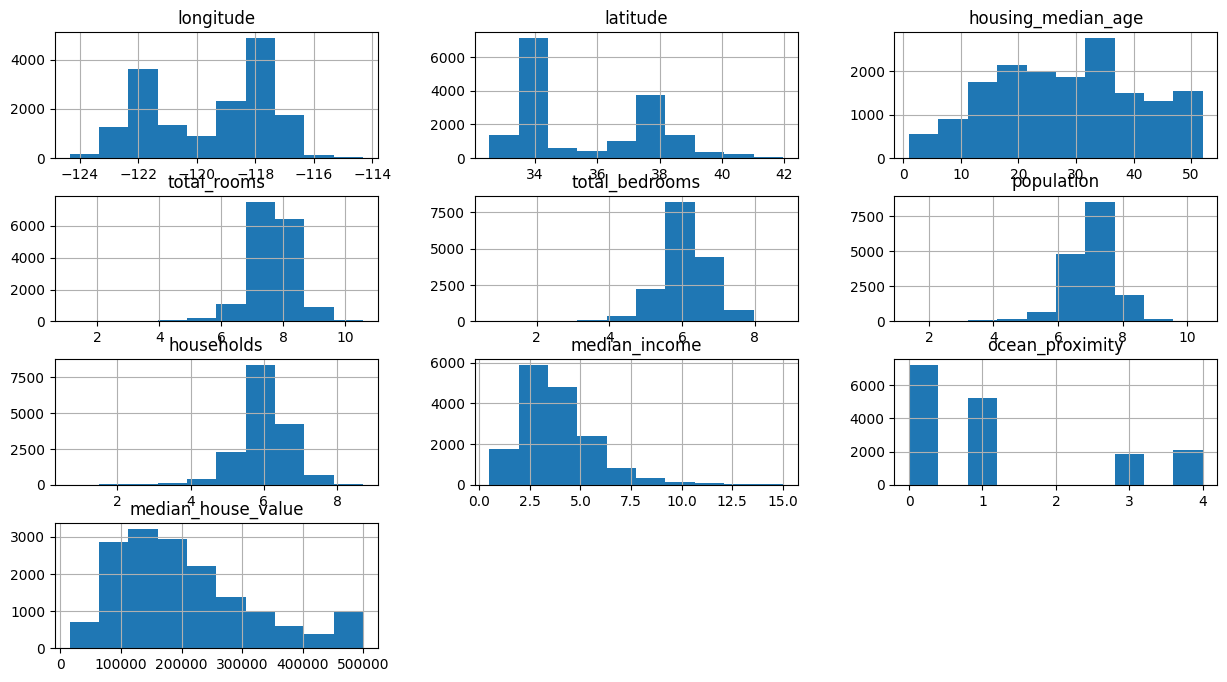

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data['ocean_proximity'] = lbl_encoder.inverse_transform(train_data['ocean_proximity'])

In [18]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7201
INLAND        5204
NEAR OCEAN    2104
NEAR BAY      1834
ISLAND           3
Name: count, dtype: int64

In [19]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity))

In [20]:
train_data.drop(['ocean_proximity'] , axis=1 , inplace= True)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4747,-118.34,34.05,39.0,6.883463,5.680173,6.584791,5.655992,2.2725,140600.0,True,False,False,False,False
14735,-117.03,32.82,16.0,7.476472,5.669881,6.612041,5.638355,4.9744,209700.0,True,False,False,False,False
19875,-119.29,36.33,19.0,6.675823,5.451038,6.464588,5.407172,0.7445,112500.0,False,True,False,False,False
20141,-119.06,34.36,52.0,7.251345,5.886104,6.889591,5.720312,2.7951,199300.0,True,False,False,False,False
316,-122.20,37.75,36.0,6.408529,4.890349,6.276643,4.897840,1.5809,70000.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,-122.02,36.97,29.0,7.851272,6.617403,7.463937,6.492240,1.9286,195300.0,False,False,False,False,True
3979,-118.61,34.19,28.0,8.249314,6.620073,7.490529,6.553933,4.1154,246400.0,True,False,False,False,False
19238,-122.62,38.54,24.0,7.787382,6.142037,6.914731,6.001415,4.5167,265200.0,True,False,False,False,False
1989,-119.79,36.73,52.0,4.727388,3.367296,5.267858,3.713572,1.9750,47500.0,False,True,False,False,False


<Axes: >

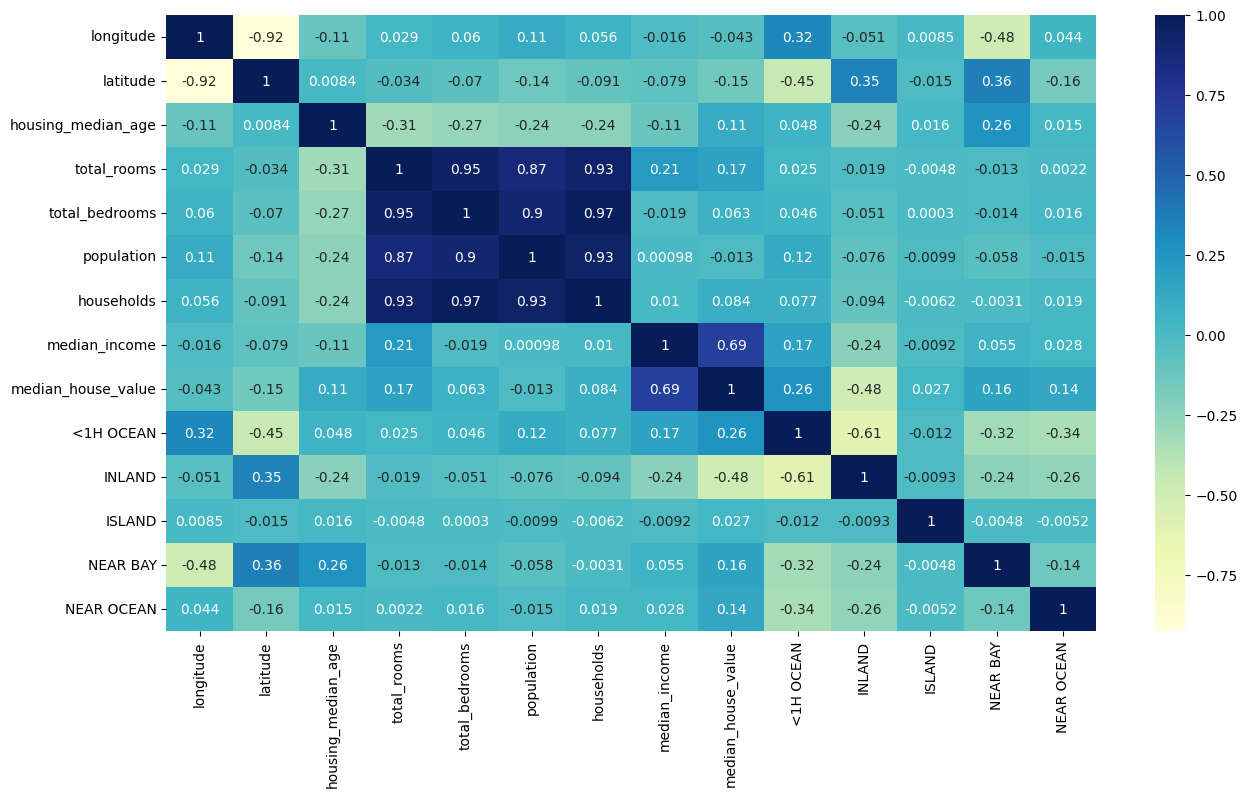

In [22]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

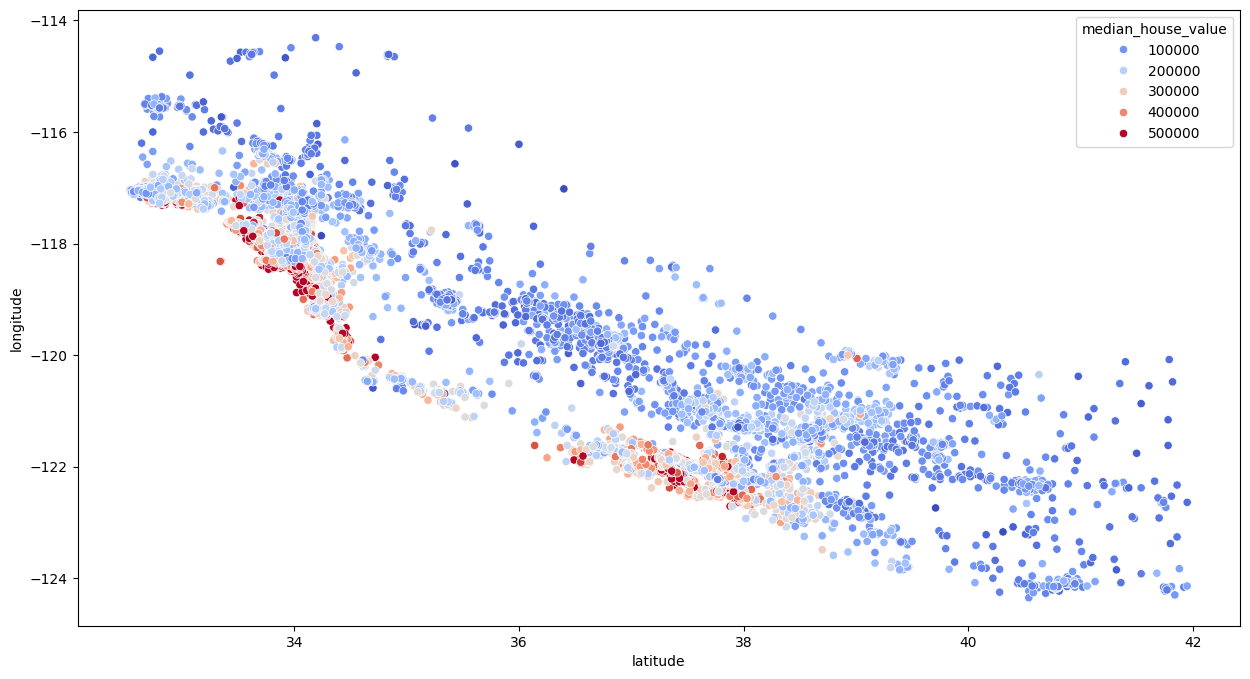

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude" , y="longitude" , data=train_data ,  hue="median_house_value" , palette="coolwarm")

In [24]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

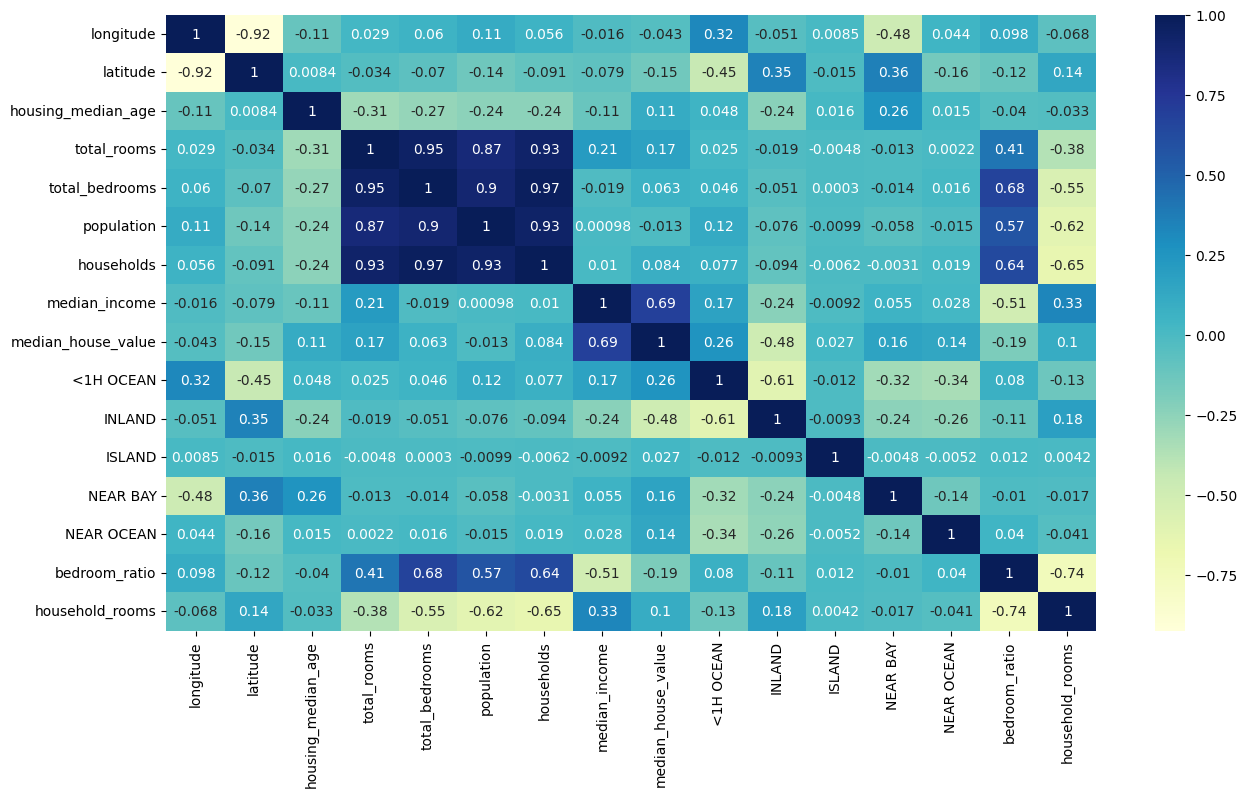

In [25]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()

x_train , y_train = train_data.drop(['median_house_value'] , axis=1) , train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

lr = LinearRegression()

lr.fit(X=x_train_s , y=y_train)



LinearRegression()

In [27]:
test_data = x_test.join(y_test)


test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity))

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [28]:
test_data.drop(['ocean_proximity'] ,axis= 1 , inplace=True)

In [29]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
4747,-118.34,34.05,39.0,6.883463,5.680173,6.584791,5.655992,2.2725,140600.0,True,False,False,False,False,0.825191,1.217021
14735,-117.03,32.82,16.0,7.476472,5.669881,6.612041,5.638355,4.9744,209700.0,True,False,False,False,False,0.758363,1.326002
19875,-119.29,36.33,19.0,6.675823,5.451038,6.464588,5.407172,0.7445,112500.0,False,True,False,False,False,0.816534,1.234624
20141,-119.06,34.36,52.0,7.251345,5.886104,6.889591,5.720312,2.7951,199300.0,True,False,False,False,False,0.811726,1.267649
316,-122.20,37.75,36.0,6.408529,4.890349,6.276643,4.897840,1.5809,70000.0,False,False,False,True,False,0.763100,1.308440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,-122.02,36.97,29.0,7.851272,6.617403,7.463937,6.492240,1.9286,195300.0,False,False,False,False,True,0.842845,1.209332
3979,-118.61,34.19,28.0,8.249314,6.620073,7.490529,6.553933,4.1154,246400.0,True,False,False,False,False,0.802500,1.258681
19238,-122.62,38.54,24.0,7.787382,6.142037,6.914731,6.001415,4.5167,265200.0,True,False,False,False,False,0.788717,1.297591
1989,-119.79,36.73,52.0,4.727388,3.367296,5.267858,3.713572,1.9750,47500.0,False,True,False,False,False,0.712295,1.273003


In [30]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3937,-118.58,34.21,13.0,8.736811,7.183871,8.226841,7.112327,4.0313,299300.0,True,False,False,False,False,0.822253,1.228404
834,-122.02,37.60,32.0,7.167038,5.690359,7.001246,5.796058,3.2386,149600.0,False,False,False,True,False,0.793963,1.236537
19741,-122.57,39.90,15.0,8.262043,6.698268,7.437206,6.442540,2.4555,55600.0,False,True,False,False,False,0.810728,1.282420
16723,-120.67,35.48,18.0,7.757906,6.095825,7.001246,6.033086,3.3438,176100.0,True,False,False,False,False,0.785756,1.285893
16447,-121.28,38.14,37.0,8.095294,6.436150,7.266827,6.356108,3.3987,99500.0,False,True,False,False,False,0.795048,1.273624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,-122.08,37.89,39.0,8.012681,6.218600,7.109879,6.194405,6.2924,283900.0,False,False,False,True,False,0.776095,1.293535
3866,-118.46,34.17,24.0,7.942718,6.516193,7.288928,6.431331,4.1875,309300.0,True,False,False,False,False,0.820398,1.235004
18125,-122.03,37.33,23.0,8.348064,6.510258,7.486053,6.464588,7.4863,412300.0,True,False,False,False,False,0.779852,1.291353
1236,-120.37,38.23,13.0,8.389814,6.721426,6.829794,5.950643,2.6942,123500.0,False,True,False,False,False,0.801141,1.409901


In [31]:
x_test , y_test = test_data.drop(['median_house_value'] , axis=1) , test_data['median_house_value']
# x_test['ISLAND'] = False
# x_test.drop(['ISLAND']  , axis=1 , inplace=True)

In [33]:
x_test_ss = scaler.transform(x_test)

In [ ]:
lr.score(x_test_ss , y_test)

0.6834033946803165

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X=x_train_s , y=y_train)

RandomForestRegressor()

In [35]:
forest.score(x_test_ss , y_test)

0.8208458000772678

In [41]:
x_train_s

array([[ 0.62000646, -0.74648593,  0.82374006, ..., -0.38435929,
         0.89200078, -0.80159229],
       [ 1.27392218, -1.32292352, -1.00147574, ..., -0.38435929,
        -0.91905981,  0.56207106],
       [ 0.14579276,  0.32203253, -0.76340412, ..., -0.38435929,
         0.65739597, -0.58133472],
       ...,
       [-1.51645103,  1.3577456 , -0.36661807, ..., -0.38435929,
        -0.09647158,  0.20656292],
       [-0.10379339,  0.50949191,  1.85538378, ..., -0.38435929,
        -2.16751335, -0.10110471],
       [ 0.8246671 , -0.72773999,  0.66502565, ..., -0.38435929,
        -0.71774394,  0.1802781 ]])

In [43]:
from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(forest, 'housePredictionModel.pkl') 



['housePredictionModel.pkl']

In [44]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
4747,-118.34,34.05,39.0,6.883463,5.680173,6.584791,5.655992,2.2725,True,False,False,False,False,0.825191,1.217021
14735,-117.03,32.82,16.0,7.476472,5.669881,6.612041,5.638355,4.9744,True,False,False,False,False,0.758363,1.326002
19875,-119.29,36.33,19.0,6.675823,5.451038,6.464588,5.407172,0.7445,False,True,False,False,False,0.816534,1.234624
20141,-119.06,34.36,52.0,7.251345,5.886104,6.889591,5.720312,2.7951,True,False,False,False,False,0.811726,1.267649
316,-122.20,37.75,36.0,6.408529,4.890349,6.276643,4.897840,1.5809,False,False,False,True,False,0.763100,1.308440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,-122.02,36.97,29.0,7.851272,6.617403,7.463937,6.492240,1.9286,False,False,False,False,True,0.842845,1.209332
3979,-118.61,34.19,28.0,8.249314,6.620073,7.490529,6.553933,4.1154,True,False,False,False,False,0.802500,1.258681
19238,-122.62,38.54,24.0,7.787382,6.142037,6.914731,6.001415,4.5167,True,False,False,False,False,0.788717,1.297591
1989,-119.79,36.73,52.0,4.727388,3.367296,5.267858,3.713572,1.9750,False,True,False,False,False,0.712295,1.273003
